In [1]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','MonthlyRate','HourlyRate','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    return df


In [24]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [6]:
features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,1,0,0,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,1,0,1,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,1,0,1,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,1,0,0,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,1,1,0,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,1,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,1,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,1,0,1,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,1,0,1,...,1,0,0,21,3,0,21,6,11,8


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
!pip install imbalanced-learn

In [9]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [11]:




# Select numerical and categorical features
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features),
    ]
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
numerical_feature_names = list(numerical_features)
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_names = numerical_feature_names + categorical_feature_names

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)

transformed_X.head()


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Cardiology,Department_Maternity,Department_Neurology
0,0.452933,-0.485786,0.750837,-1.008126,-0.185924,0.529497,-0.495147,-0.679119,1.00566,0.485786,...,-0.426280,-2.178097,4.197883,-0.169491,-0.073053,-0.681553,0.242949,1.0,0.0,0.0
1,1.329511,2.058519,-1.299105,-0.149829,-0.185924,0.529497,-0.495147,1.472495,1.00566,0.485786,...,-0.170938,0.151012,-0.238215,0.486551,0.754220,-0.371823,0.804968,0.0,1.0,0.0
2,0.014644,-0.485786,1.425849,-0.885512,-0.185924,0.529497,-0.495147,1.472495,-0.31629,0.485786,...,-0.553950,0.151012,-0.238215,-1.153553,-1.176083,-0.681553,-1.162098,0.0,1.0,0.0
3,-0.423644,2.058519,1.473174,-0.762898,-0.185924,0.529497,-0.495147,-0.679119,-0.31629,0.485786,...,-0.426280,0.151012,-0.238215,0.158530,0.754220,0.247636,-1.162098,0.0,1.0,0.0
4,-1.081078,-0.485786,-0.521970,-0.885512,-0.185924,0.529497,2.019601,-0.679119,-0.31629,0.485786,...,-0.681621,0.151012,-0.238215,-0.825533,-0.624568,-0.062094,-0.600079,0.0,1.0,0.0


In [12]:
transformed_X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Cardiology', 'Department_Maternity',
       'Department_Neurology'],
      dtype='object')

In [13]:
from imblearn.over_sampling import SMOTE

# Assuming you have separate X (features) and y (target) variables
smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)


# Modeling
model = LogisticRegression(random_state=11, max_iter = 1000)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)





Training Accuracy: 0.9267569856054191
Testing Accuracy: 0.9136904761904762


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       296
           1       0.60      0.80      0.69        40

    accuracy                           0.91       336
   macro avg       0.79      0.86      0.82       336
weighted avg       0.93      0.91      0.92       336



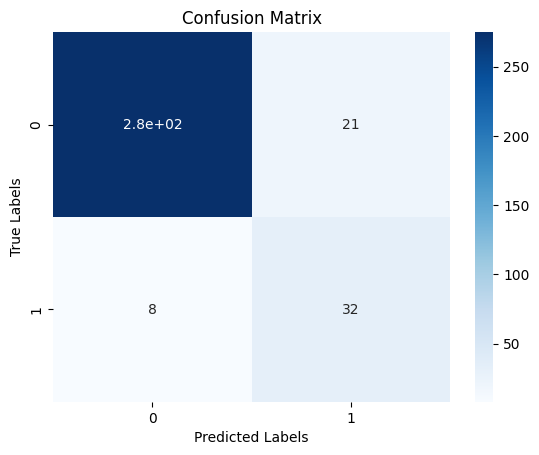

In [15]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = [
    {'penalty': ['elasticnet', 'l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Create the random forest classifier
model = LogisticRegression(random_state=11, max_iter = 1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'penalty': 'l2'}
Best Score:  0.9220982621754988
Training Accuracy: 0.9267569856054191
Testing Accuracy: 0.9136904761904762


c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       296
           1       0.60      0.80      0.69        40

    accuracy                           0.91       336
   macro avg       0.79      0.86      0.82       336
weighted avg       0.93      0.91      0.92       336



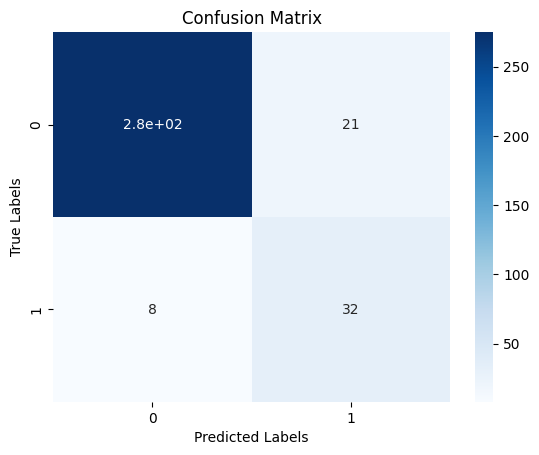

In [17]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
# #feature importance score and plot them
# feature_importance = best_model.feature_importances_
# print(feature_importance)

# # Create a horizontal bar plot to visualize the feature importance scores
# plt.figure(figsize=(10, 14))

# # Sort the feature importance scores and corresponding feature names
# sorted_indices = np.argsort(feature_importance)
# sorted_features = X_train.columns[sorted_indices]
# sorted_scores = feature_importance[sorted_indices]

# plt.barh(sorted_features, sorted_scores)
# plt.xlabel('Score')
# plt.ylabel('Feature')
# plt.title('Feature Importance')

# # Change the x-axis scale to logarithmic
# plt.xscale('log')
# plt.show()

In [21]:
# without sampling

In [18]:
# Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

# Modeling
model = LogisticRegression(random_state=11, max_iter = 1000)
model.fit(X_train1, y_train1)

# Calculate the training accuracy
train_accuracy = model.score(X_train1, y_train1)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test1, y_test1)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9425373134328359
Testing Accuracy: 0.9345238095238095


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Create the random forest classifier
model = LogisticRegression(random_state=11, max_iter = 1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.9220982621754988
Training Accuracy: 0.9267569856054191
Testing Accuracy: 0.9136904761904762


c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       296
           1       0.60      0.80      0.69        40

    accuracy                           0.91       336
   macro avg       0.79      0.86      0.82       336
weighted avg       0.93      0.91      0.92       336



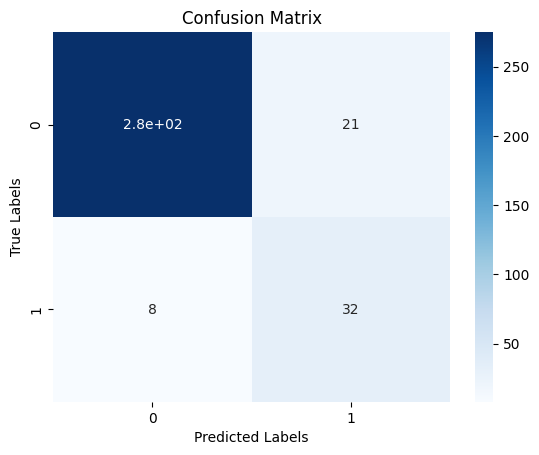

In [20]:
# Make predictions on the testing data
y_pred1 = best_model.predict(X_test1)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test1, y_pred1))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
#PCA

Training Accuracy: 0.8742591024555462
Testing Accuracy: 0.8303571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       296
           1       0.39      0.78      0.52        40

    accuracy                           0.83       336
   macro avg       0.68      0.81      0.71       336
weighted avg       0.90      0.83      0.85       336



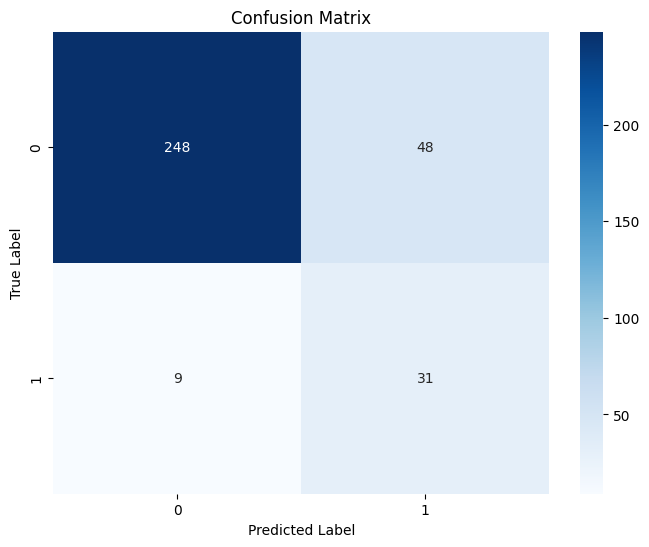

In [22]:

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=10)),  # Apply PCA with 10 components
    ('select', SelectKBest(score_func=f_classif, k=5)),  # Select top 5 features using ANOVA F-value
    ('clf', LogisticRegression())  # Logistic Regression classifier
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Generate classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
